In [1]:
from PIL import Image
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
x = np.array(Image.open('../image/jerem.jfif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((15,15))
h = h / np.linalg.norm(h)**2

In [4]:
from algorithme.admmp2 import ADMMP2

In [5]:
algo = ADMMP2(x/255., h)

In [6]:
algo = ADMMP2(x/255., h, lambd=0.5, mu=0.2, nu=0.4)

In [8]:
y = algo.gaussian_filter_2d()

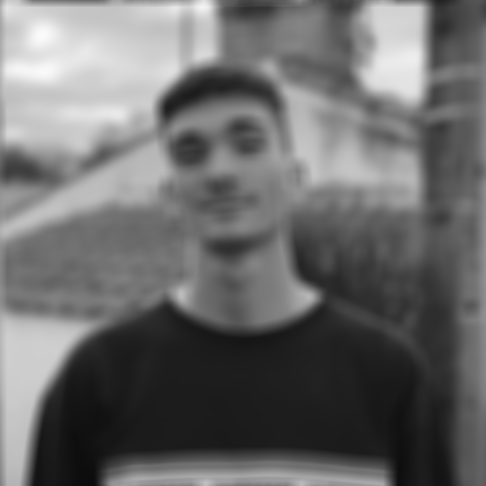

In [9]:
Image.fromarray(np.uint8(y*255))

In [152]:
X_, iter,tabError,tabTime = algo.fit_transform(y)

/home/heez/Documents/GitHub/Image_Restoration_SDI/src/algorithme/admmp2.py:174: RuntimeWarning: invalid value encountered in scalar divide
  tabTime.append(time()-timeRef)


(array([[-1.52199782e+211,  1.52199782e+211, -1.52199782e+211, ...,
          1.52199782e+211, -1.52199782e+211,  1.52199782e+211],
        [ 1.52199782e+211, -1.52199782e+211,  1.52199782e+211, ...,
         -1.52199782e+211,  1.52199782e+211, -1.52199782e+211],
        [-1.52199782e+211,  1.52199782e+211, -1.52199782e+211, ...,
          1.52199782e+211, -1.52199782e+211,  1.52199782e+211],
        ...,
        [ 1.52199782e+211, -1.52199782e+211,  1.52199782e+211, ...,
         -1.52199782e+211,  1.52199782e+211, -1.52199782e+211],
        [-1.52199782e+211,  1.52199782e+211, -1.52199782e+211, ...,
          1.52199782e+211, -1.52199782e+211,  1.52199782e+211],
        [ 1.52199782e+211, -1.52199782e+211,  1.52199782e+211, ...,
         -1.52199782e+211,  1.52199782e+211, -1.52199782e+211]]),
 5,
 [1.1622289103090892e+29,
  3.0575725215412155e+36,
  3.057572521541342e+36,
  3.0575725215412067e+36,
  inf],
 [0.26114559173583984,
  0.5508737564086914,
  0.8397338390350342,
  1.0429775

In [10]:
x = algo.x
pre_comput_Ty, inv_Tmu = algo._precompute_matrix(x, y, algo.mu)

eta0, eta1 = np.zeros(x.shape),  np.zeros(x.shape)
x = pre_comput_Ty
u0 = inv_Tmu @ (pre_comput_Ty + algo.mu * (algo.A_dot(x) + eta0))
rx, R = algo.wavelet_regularization(x*255)
u1 = algo._shrink(rx + eta1, algo.lambd/(algo.mu*algo.nu))

In [16]:
inv_Tmu

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 5.]])

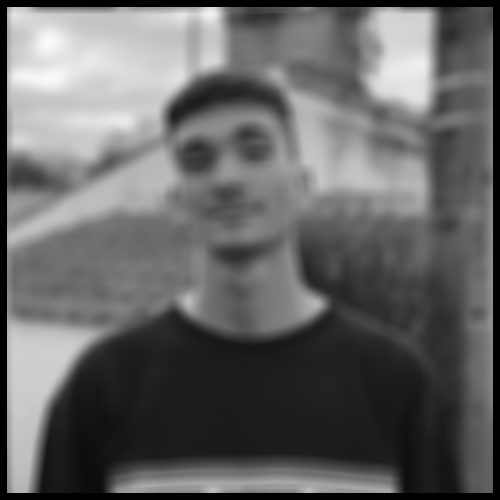

In [15]:
Image.fromarray(np.uint8(u0))

In [322]:
rx

array([[-0.00807139, -0.0390669 , -0.03996184, ..., -0.06446663,
        -0.0508923 ,  0.0456116 ],
       [-0.04145733, -0.12253196, -0.11228383, ..., -0.13650046,
        -0.12671555,  0.07688457],
       [-0.0424551 , -0.11362961, -0.0986325 , ..., -0.10947775,
        -0.10343125,  0.06014864],
       ...,
       [-0.07351735, -0.16179633, -0.13548077, ..., -0.10720047,
        -0.10389292,  0.02710591],
       [-0.05843862, -0.15879717, -0.12550121, ..., -0.09959166,
        -0.11191989,  0.02638754],
       [ 0.04034651,  0.06532342,  0.04721461, ...,  0.03077832,
         0.03231977, -0.02541095]])

In [312]:
u0*255

array([[20.59770864, 17.60981728, 14.61414321, ..., 29.39196049,
        26.49864691, 23.5651358 ],
       [17.63974321, 15.08112593, 12.51557531, ..., 25.16855309,
        22.69191111, 20.1805037 ],
       [14.68815802, 12.55782716, 10.42149136, ..., 20.95514074,
        18.89384691, 16.80333827],
       ...,
       [29.51859753, 25.2358716 , 20.94305185, ..., 42.13268148,
        37.98089877, 33.77331358],
       [26.53738272, 22.68740741, 18.82810864, ..., 37.87446914,
        34.14350617, 30.36183704],
       [23.56365432, 20.1453037 , 16.71838025, ..., 33.62739753,
        30.31595062, 26.95899259]])

In [317]:
rx*255

array([[ 0.02372325,  0.04579462,  0.03634104, ...,  0.06520224,
         0.22706612,  0.07953173],
       [ 0.04579462,  0.08840052,  0.07015163, ...,  0.12586438,
         0.43832141,  0.15352559],
       [ 0.03634104,  0.07015163,  0.05566993, ...,  0.12236669,
         0.42429233,  0.14754041],
       ...,
       [ 0.13536437,  0.25935315,  0.25511799, ...,  0.04267435,
         0.09210336, -0.02162634],
       [ 0.47233225,  0.90519564,  0.88932763, ...,  0.09266334,
         0.12873852, -0.13993371],
       [ 0.16567992,  0.31764899,  0.31142527, ..., -0.02281242,
        -0.14422753, -0.1129862 ]])

In [316]:
algo.lambd/(algo.mu*algo.nu)

6.249999999999999

In [323]:
abs(algo.A_fft)**2 + algo.nu*sum(abs(np.fft.fft2(R))**2,3)

ValueError: operands could not be broadcast together with shapes (500,500) (513,) 

In [324]:
abs(algo.A_fft)**2

array([[1.        , 0.99705574, 0.98826446, ..., 0.97374982, 0.98826446,
        0.99705574],
       [0.99705574, 0.99412016, 0.98535476, ..., 0.97088285, 0.98535476,
        0.99412016],
       [0.98826446, 0.98535476, 0.97666664, ..., 0.96232234, 0.97666664,
        0.98535476],
       ...,
       [0.97374982, 0.97088285, 0.96232234, ..., 0.94818871, 0.96232234,
        0.97088285],
       [0.98826446, 0.98535476, 0.97666664, ..., 0.96232234, 0.97666664,
        0.98535476],
       [0.99705574, 0.99412016, 0.98535476, ..., 0.97088285, 0.98535476,
        0.99412016]])

In [326]:
sum(abs(np.fft.fft2(R))**2,3).shape

(513,)

In [327]:
x = algo.x
pre_comput_Ty, inv_Tmu = algo._precompute_matrix(x, y, algo.mu)

eta0, eta1 = np.zeros(x.shape),  np.zeros(x.shape)
x = pre_comput_Ty
u0 = inv_Tmu @ (pre_comput_Ty + algo.mu * (algo.A_dot(x) + eta0))
rx, R = algo.wavelet_regularization(x)
u1 = algo._shrink(rx + eta1, algo.lambd/(algo.mu*algo.nu))
x_ = algo.H_inv_dot(algo.A_dot_adj((u0 - eta0)) + algo.nu * algo.wavelet_regularization_adjoint(u1 - eta1), R)   # transpose sur le A_dot??
        

In [18]:
a = np.pad(np.eye(y.shape[0], y.shape[1]), pad_width=((x.shape[0] - y.shape[0])//2, (x.shape[1] - y.shape[1])//2), mode='constant', constant_values=0) + algo.mu * np.eye(x.shape[0], x.shape[1])

In [19]:
a

array([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.2]])

In [22]:
np.pad(np.eye(y.shape[0], y.shape[1]), pad_width=((x.shape[0] - y.shape[0])//2, (x.shape[1] - y.shape[1])//2), mode='constant', constant_values=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])